# Lab 4: Frequency Response Characterization

Type name here

Monday 12:10pm section

Table #

## Contents:

1. [Pre-lab Questions](#prelab)
1. [Lab Procedure](#lab)
1. [Post-lab Questions](#postlab)
1. [Submissions](#sub)

## Learning Objectives

1. Measure the frequency response of a linear system using sine waves and chirp signals
2. Calculate the magnitude and phase of the transfer function from frequency responses
3. Plot and analyze the Bode plot of a linear system from experimental data
4. Determine system properties from the Bode plot

<a id='prelab'></a>

## Pre-lab Questions

In Lab 1, we saw how the properties of a mass-spring-damper system can be determined by examining its step response.  It turns out that any linear system can be fully determined by its step response, although it's challenging to determine a system's properties for higher than second-order systems.  One reason for this is that all of a linear system's dynamics are excited by step inputs.  It would be like trying to tune a single instrument if the entire band is playing at the same time.

A more accurate way to identify a system's properties is to look at its *frequency response*, which is the response of the system to sinusoidal inputs of different frequencies.  The reason this often works well is that each dynamic mode of the system has a natural frequency associated with it, and these modes tend to respond only to input signals of a similar frequency (e.g. resonance).  Thus, as the input frequency is increased, each mode is excited one at a time.

For any linear system, giving a sine wave input produces a sine wave output at the same frequency.  Generally the ampltidue and phase of the output are different, however.

In this lab, we are concerned with identifying the amplitude and phase angle of the output sinusoid compared to the input sinusoid.  Let's assume the input is \\(F(t) = F_0 \sin(\omega t)\\) and the output is \\(x(t) = X \sin(\omega t + \phi)\\).  To estimate the parameters of the system, we need the amplitude ratio of the output to input and the phase of the output with respect to the phase of the input.

A mass-spring-damper system subject to a sinusoidal force is governed by the following equation:

\\(m \ddot{x} + b \dot{x} + kx = F_0 \sin(\omega t)\\)

We can express the solution to this equation as

\\(x(t) = X \sin(\omega t + \phi)\\)

where

\\(X = \dfrac{F_0}{\sqrt{(k-m\omega^2)^2+(b\omega)^2}}\\)

\\(\phi = -\tan^{-1}\left( \dfrac{b\omega}{k-m\omega} \right)\\)

Introducing the definitions

\\(\omega_n = \sqrt{\dfrac{k}{m}}\\), \\(\zeta = \dfrac{b}{2m\omega_n}\\), and \\(\delta_{st} = \dfrac{F_0}{k}\\)

which are the natural frequency, damping ratio, and static deflection, respectively, we can write

\\(M = \dfrac{X}{\delta_{st}} = \dfrac{1}{\sqrt{(1-r^2)^2 + (2\zeta r)^2}}\\)

called the *amplification factor*, and

\\(\phi = -\tan^{-1} \left( \dfrac{2\zeta r}{1-r^2} \right)\\)

in terms of the frequency ratio \\(r = \dfrac{\omega}{\omega_n}\\), which is the ratio of the forcing frequency to the natural frequency of the system.

Let's make a plot of \\(M\\) and \\(\phi\\) vs. \\(r\\).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

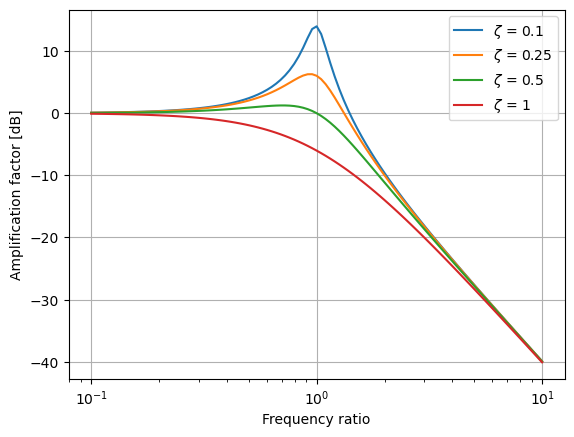

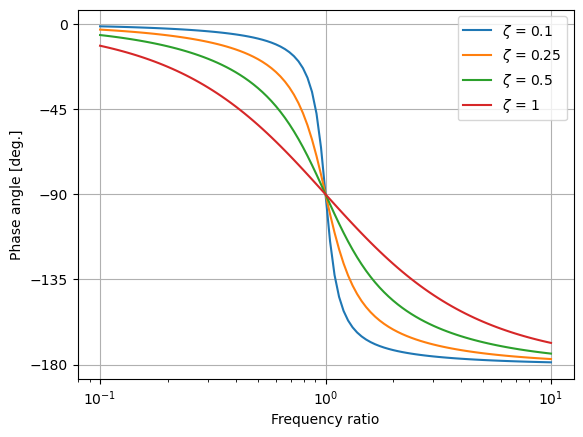

In [2]:
r = np.logspace(-1,1,101)
zeta_array = [0.1, 0.25, 0.5, 1]
for zeta in zeta_array:
    M = 1/np.sqrt((1-r**2)**2+(2*zeta*r)**2)
    phi = -np.arctan2(2*zeta*r,1-r**2)
    plt.figure(1)
    plt.semilogx(r,20*np.log10(M),label = '$\zeta$ = {}'.format(zeta))
    plt.figure(2)
    plt.semilogx(r,180/np.pi*phi,label = '$\zeta$ = {}'.format(zeta))
    
plt.figure(1)
plt.ylabel('Amplification factor [dB]')
plt.xlabel('Frequency ratio')
plt.legend()
plt.grid(True)
plt.figure(2)
plt.ylabel('Phase angle [deg.]')
plt.xlabel('Frequency ratio')
plt.yticks([0,-45,-90,-135,-180])
plt.legend()
plt.grid(True)

It is common to plot the magnitude in decibels and the phase angle in degrees.  This type of frequency response plot is called a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot), which is useful for quickly assessing the stability of linear systems and how to improve stability and performance without the need for much calculation.

How to produce and analyze these plots experimentally is a primary objective of this lab.

The following cell loads the file `test4.txt` and plots the motor voltage (input to the system) and the cart position (system's reponse) vs. time.  This is an example of a sine sweep input.

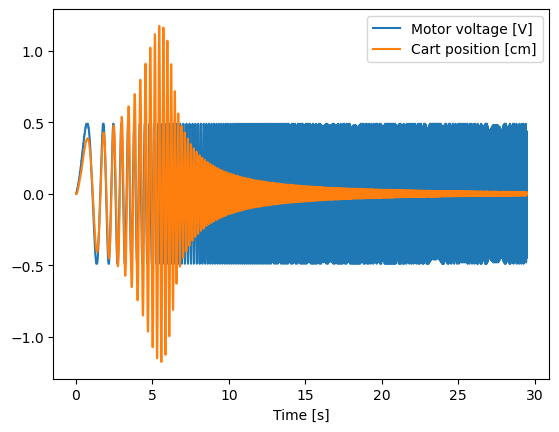

In [3]:
# read data from text file, skipping first row
data = np.genfromtxt('test4.txt',skip_header=1)
t = data[:,1]            # time is column 2 (recall column numbering starts at 0) [s]
r = data[:,2]/100        # input motor voltage is column 3 [V]
x = data[:,3]/160410*100 # position is column 4 [cm]
plt.plot(t,r,label='Motor voltage [V]')
plt.plot(t,x,label='Cart position [cm]')
plt.xlabel('Time [s]')
plt.legend()

**Problem 1 (10 points):**

Notice that the frequency of the motor voltage increases with respect to time.  Use the `find_peaks` function to plot the frequency of this signal as a function of time.  (Hint: check out the Peak_Analysis.ipynb notebook on Canvas.)  You should find that the frequency increases roughly linearly with respect to time.  There will be a lot of "noise" at the high frequency end.  This is because there are few samples per cycle at the higher frequencies and so the amplitudes will be inaccurate.

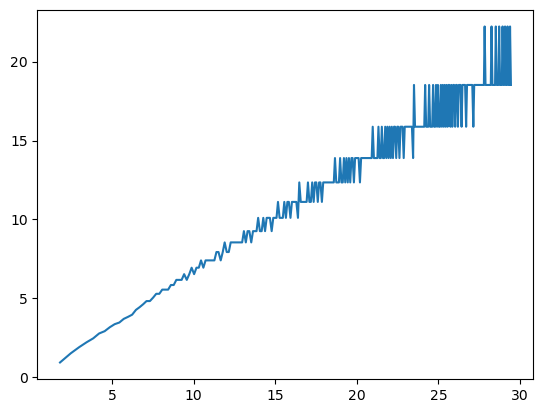

In [4]:
peaks, _ = ss.find_peaks(x)

p = t[peaks[1:-1]] - t[peaks[0:-2]]
f = 1/p

plt.plot(t[peaks[1:-1]], f)


**Problem 2 (10 points):**

Now, we will make a Bode plot from this experimental sine sweep data.  Plot the amplitude (peak values) of the response x vs. the frequency array you found in Problem 1.  You'll need to convert the amplitudes into decibels (dB): use the formula

$A_{dB} = 20 \log (A)$

where $A$ is the amplitude, and $A_{dB}$ is the amplitude converted into dB.  This log is the log base 10.

Use the [matplotlib.pyplot.semilogx](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogx.html) function to plot frequency (x-axis) using a log scale.

Your plot should look similar to the first plot in this notebook, "Amplification factor vs. Frequency ratio".  Note, you may need to trim either the frequency array or the peaks array if they are not exactly the same length.  This can happen if r and x don't have the exact same number of cycles.

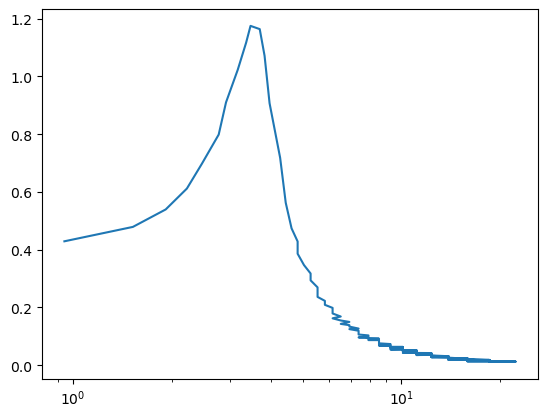

In [5]:
plt.semilogx(f, x[peaks[1:-1]])

(Note, you'll also have to make a phase vs. frequency plot, but we'll save that for the Post-lab.)

<a id='lab'></a>

## Lab Procedure

### Part 1: Constructing a Bode plot from steady-state harmonic responses

For the first part of the lab, you will apply sinusoidal forces of different frequencies to the mass-spring-damper system, saving the raw data for each trial.  You do this for the system with its cart carrying two blocks of added mass (0.983 kg).  You will use 10 different frequencies.

**In-person labs:**

Open the ECP Executive software from the desktop icon.

**For this lab, the motion controller (large cream-colored box) next to your computer must be turned on.**

Each trial will proceed as follows:
<br><br>
1. Go to *Command > Trajectory*, select *Sinusoidal*, then click *Setup*.
<br><br>
2. Choose *Open Loop Move*, and set *Amplitude = 0.50*, *Frequency = f*, where *f* is the frequency of the current trial (see table below), and set *Number of Reps = 30*.  Click *OK* to close that window, then click *OK* to close the next window.
<br><br>
3. Go to *Command > Execute* and click *Run*.  The system will be driven back and forth at the given frequency 30 times.  This will give you enough cycles at steady state to do your analysis post-lab.
<br><br>
4. To see the response, go to *Plotting > Setup Plot*. Choose *encoder 1 position* and *commanded pos* only in the left axis box, then click plot data. The plot will show the trajectory of the cart and the commanded sinusoid.  Ensure that the cart has reached a steady-state oscillation.  After you setup the plot the first time, you only need to hit *Plotting > Plot data* to see your plot.  Take a screenshot and save the image of the plot with an appropriate filename for potential inclusion in your post-lab analysis.
<br><br>
5. Go to *Data > Export raw data*. Pick an appropriate file name, and export the data somewhere you can access it later (portable memory drive/USB stick, Google Drive, etc.).

**Online labs:**

Open the file "Lab 4 simulator.ipynp" in a separate tab.

1. In the first cell in Part 1, input the input sine frequency of the specific trial you are on as listed below in the table.  Do not change the value of the other parameters between trials.

2. Take a screen capture of the output trajectory.  The cart motion will be unsteady at first, then reach a steady sinusoidal motion.

3. Run the last cell to save your data into a text file.  It will prompt you for a file name.  You should not add the ".txt" to the file name; this will be added automatically.

<table>
  <tr>
    <th style='text-align: center'>Trial</th>
    <th style='text-align: center'>Frequency [Hz]</th>
  </tr>
  <tr>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>0.5</td>
  </tr>
  <tr>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>1.0</td>
  </tr>  <tr>
    <td style='text-align: center'>3</td>
    <td style='text-align: center'>1.5</td>
  </tr>  <tr>
    <td style='text-align: center'>4</td>
    <td style='text-align: center'>2.0</td>
  </tr>  <tr>
    <td style='text-align: center'>5</td>
    <td style='text-align: center'>2.5</td>
  </tr>  <tr>
    <td style='text-align: center'>6</td>
    <td style='text-align: center'>3.0</td>
  </tr>  <tr>
    <td style='text-align: center'>7</td>
    <td style='text-align: center'>3.5</td>
  </tr>  <tr>
    <td style='text-align: center'>8</td>
    <td style='text-align: center'>4.0</td>
  </tr>  <tr>
    <td style='text-align: center'>9</td>
    <td style='text-align: center'>4.5</td>
  </tr>  <tr>
    <td style='text-align: center'>10</td>
    <td style='text-align: center'>5.0</td>
  </tr>
</table>

In general, you should notice the amplitude of the cart's motion increase and then decrease as the forcing frequency increases.  Additionally, the cart's motion should lag further and further behind the forcing sinusoid as the frequency increases.

### Part 2: Analyzing harmonic responses using sine sweeps

Sine sweeps, or chirp signals, vary the frequency of the input slowly and continuously so that an entire frequency response can be captured from one trial.

**In-person labs:**

**Open loop:**

First, we will capture an open-loop (i.e. no feedback control) sine sweep.  The process for using the sine sweep is the following:

1. Go to *Command > Trajectory*, select *Sine sweep*, then click *Setup*.

2. Choose *Open Loop Sweep* and *Linear sweep* on the right, and set *Amplitude = 0.5V*, *Start Frequency = 0.1 Hz*, *End Frequency = 10 Hz*, and *Sweep Time = 29.5 sec*.  Click *OK* to close that window, then click *OK* to close the next window.

3. Click *Utility > Zero position* to zero the encoders (make sure the cart is at rest when you do this).

4. Go to *Command > Execute* and click *Run*.  You will see the cart oscillate faster and faster.  Do not disturb the cart or the lab table during the trial.

5. To see the frequency response, go to *Plotting > Setup Plot*. Choose *encoder 1 position* only in the left axis box.  On the right side, choose *Logarithmic Freq* under *Horizontal Axis*, and choose *Db* under *Vertical Axis*, then click plot data. The plot will show the amplitude of the cart's motion in decibels.  The peaks should resemble one of the Bode plots shown in the pre-lab.  Take a screenshot and save the image of the plot with an appropriate filename for potential inclusion in your post-lab analysis.

6. Go to *Data > Export raw data*. Pick an appropriate file name, and export the data somewhere you can access it later (portable memory drive/USB stick, Google Drive, etc.).

**Closed loop:**

We will now examine closed-loop sine sweeps using PD (Proportional-Derivative) control.  The process for using the sine sweep is the following:

1. Go to *Setup > Control algorithm* and set the radio button to *PID* (keep it here for the rest of the lab).

2. Click *Setup algorithm*.  In this window, input your desired values of \\(K_P = 0.1\\), \\(K_I = 0.0\\), and \\(K_D = 0.0\\).  Click *OK*.

3. Click the *Implement algorithm*.  This step is crucial for changing the gains of your controller; if you forget this step, it will keep using the old values.  Close the window by hitting *OK*.

4. Go to *Command > Trajectory*, select *Sine sweep*, then click *Setup*.

5. Choose *Closed Loop Sweep* and *Linear sweep* on the right, and set *Amplitude = 1000 counts*, *Start Frequency = 1 Hz*, *End Frequency = 20 Hz*, and *Sweep Time = 29.5 sec*.  Click *OK* to close that window, then click *OK* to close the next window.

6. Go to *Command > Execute* and click *Run*.  You will see the cart oscillate faster and faster.  Do not disturb the cart or the lab table during the trial.

7. To see the frequency response, go to *Plotting > Setup Plot*. Choose *encoder 1 position* only in the left axis box.  On the right side, choose *Logarithmic Freq* under *Horizontal Axis*, and choose *Db* under *Vertical Axis*, then click plot data. The plot will show the amplitude of the cart's motion in decibels.  The peaks should resemble one of the Bode plots shown in the pre-lab.  Take a screenshot and save the image of the plot with an appropriate filename for potential inclusion in your post-lab analysis.

8. Go to *Data > Export raw data*. Pick an appropriate file name, and export the data somewhere you can access it later (portable memory drive/USB stick, Google Drive, etc.).

9. Repeat the previous steps using \\(K_D = 0.001\\) and then again using \\(K_D = 0.005\\).

**Turn off the motion controller and close the ECP software after all trials are done.**

**Online labs:**

Follow the directions in Part 2 of the Lab 4 Simulator notebook to run the open-loop and closed-loop simulations.  For the closed-loop simulations, use the same PID gains as the in-person lab listed in the previous paragraph.

<a id='postlab'></a>

## Post-lab Questions

1. Use your pre-lab code from Lab 3 on each of the 10 trials you ran in Part 1.  For each trial, compute the magnitude of the output (cart position) and the phase angle between the output (cart position) and the input (motor voltage).

2. Compile each of these 10 magnitudes and phase angles into a Bode plot.  Your magnitude units should be decibels (dB), your phase units should be degrees, and your frequency units should be Hz using a logarithmic scale `plt.semilogx`.

3. Estimate \\(\omega_n\\) and \\(\zeta\\) by fitting the theoretical Bode plot (from the pre-lab) to your experimental Bode plot.  How does this compare to the \\(\omega_n\\) and \\(\zeta\\) you estimated in Lab 1 for the cart with two masses?

4. Create a Bode plot for each of the sine sweeps you performed in Part 2.  To do this, use your Lab 4 pre-lab code.  Remember to include the phase angle vs. frequency plot for each!

In [43]:
# Question 1

dPhase = [] # For Q2
amps = []

# Iterate through each trial
for trial in [.5,1,1.5,2,2.5,3,3.5,4,4.5,5]:
    print(f"Frequency: {trial}")

    # read data from text file, skipping first row
    data = np.genfromtxt(f'Capture/PT1({trial}hz).txt',comments=';',skip_header=3,skip_footer=1)
    t = data[:,0]     # time is column 1 (recall column numbering starts at 0)
    r = data[:,2]     # desired (reference) position is column 3
    x = data[:,3]     # actual position is column 4
    # plt.plot(t,r,label='Desired')
    # plt.plot(t,x,label='Actual')
    # plt.ylabel('Position [V]')
    # plt.xlabel('Time [s]')
    # plt.legend()

    # Effective Amplitude
    peaks,_ = ss.find_peaks(r,prominence=1.0)
    amp = np.sqrt(2*np.mean(r**2)) #Using Eq (1)
    # print(amp)
    # plt.plot(t[peaks], r[peaks], "r*")
    
    p = np.mean(t[peaks][1:-1] - t[peaks][0:-2])
    f = 1/p

    Ar = 2/amp * np.mean(np.sin(f * t)*r) #Using Eq (2,3)
    Br = 2/amp * np.mean(np.cos(f * t)*r)
    phir = np.arctan2(Br,Ar)
    # print(Ar, Br, phir)

    # For X
    peaks,_ = ss.find_peaks(x,prominence=1.0)
    amp = np.sqrt(2*np.mean(x**2)) #Using Eq (1)

    print(f"Amplitude: {amp}")
    amps.append(amp)
    # print(amp)
    # plt.plot(t[peaks], x[peaks], "r*")
    p = np.mean(t[peaks][1:-1] - t[peaks][0:-2])
    f = 1/p

    Ax = 2/amp * np.mean(np.sin(f * t)*x) #Using Eq (2,3)
    Bx = 2/amp * np.mean(np.cos(f * t)*x)
    phix = np.arctan2(Bx,Ax)
    # print(Ax, Bx, phix)

    print(f"Phase Difference: {phix-phir}")
    dPhase.append(phix-phir)

plt.show()

Frequency: 0.5
Amplitude: 869.0056594092237
Phase Difference: -0.4409677671107354
Frequency: 1
Amplitude: 917.123213089707
Phase Difference: -0.14120737592404708
Frequency: 1.5
Amplitude: 1036.9565179838903
Phase Difference: -0.05107834867427696
Frequency: 2
Amplitude: 1228.0743456964208
Phase Difference: -0.006371898788533836
Frequency: 2.5
Amplitude: 1635.0284695283733
Phase Difference: -0.12654459477732338
Frequency: 3
Amplitude: 2036.1608985266632
Phase Difference: 1.77363175696146
Frequency: 3.5
Amplitude: 2300.974860678335
Phase Difference: 1.9835776660226543
Frequency: 4
Amplitude: 1731.4351461903784
Phase Difference: 0.08281090027973059
Frequency: 4.5
Amplitude: 1148.3185102940781
Phase Difference: -0.14835701191982775
Frequency: 5
Amplitude: 815.2737713732465
Phase Difference: -0.16619513688545795


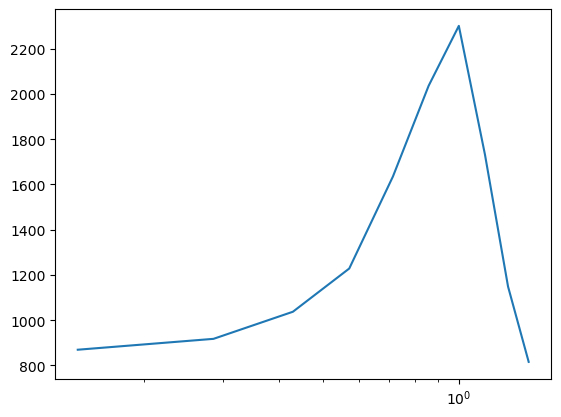

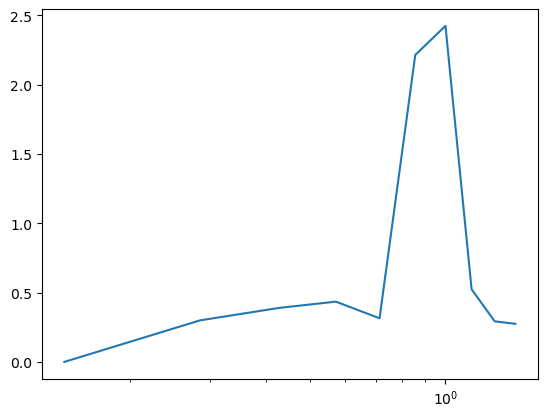

In [44]:
# Question 2
# Center
dPhase = [x+0.4409677671107354 for x in dPhase]
freqs = np.divide([.5,1,1.5,2,2.5,3,3.5,4,4.5,5],3.5)


plt.semilogx(freqs, amps)
plt.show()
plt.semilogx(freqs, dPhase)


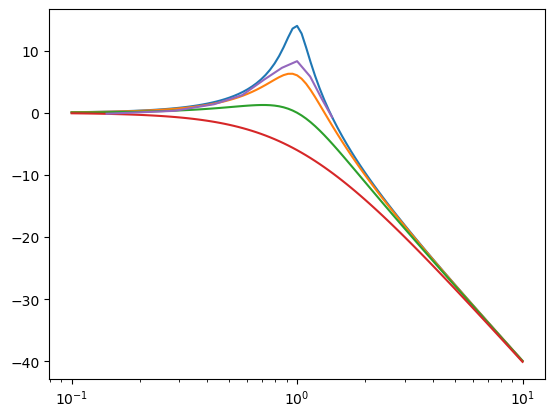

In [51]:
# Question 3
# The bode plot is between a zeta of .1 and .25, it is most likly around .18
# This is around what I got in Lab 1

r = np.logspace(-1,1,101)
zeta_array = [0.1, 0.25, 0.5, 1]
for zeta in zeta_array:
    M = 1/np.sqrt((1-r**2)**2+(2*zeta*r)**2)
    phi = -np.arctan2(2*zeta*r,1-r**2)
    plt.figure(1)
    plt.semilogx(r,20*np.log10(M),label = '$\zeta$ = {}'.format(zeta))


plt.semilogx(freqs, 20*np.log10(amps)-np.log10(amps[0])-56)




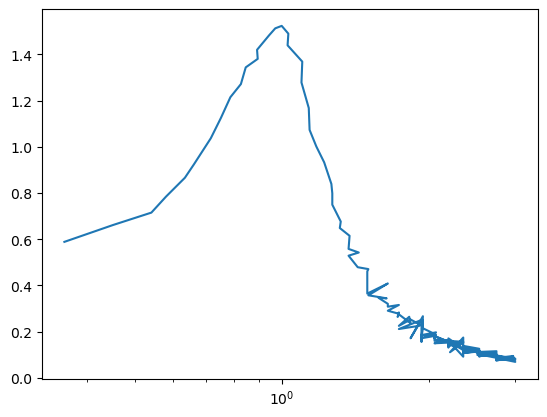

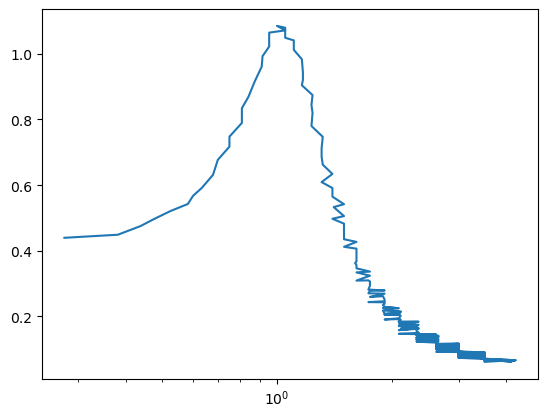

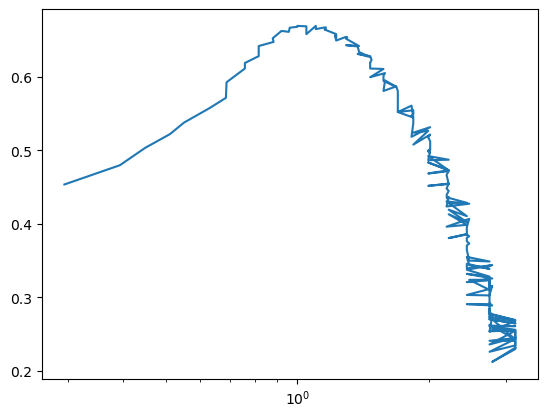

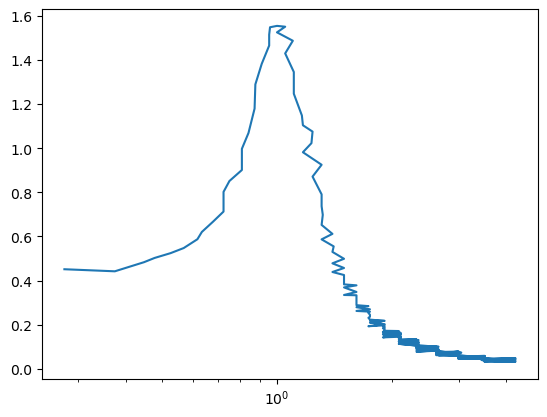

In [55]:
# Question 4

for trial in ["Open", "Closed KD.001", "Closed KD.005", "Closed KD0"]:
    # read data from text file, skipping first row
    data = np.genfromtxt(f'Capture/PT2{trial}.txt',comments=';',skip_header=3,skip_footer=1)
    t = data[:,1]            # time is column 2 (recall column numbering starts at 0) [s]
    r = data[:,2]/100        # input motor voltage is column 3 [V]
    x = data[:,3]/160410*100 # position is column 4 [cm]

    peaks, _ = ss.find_peaks(x)

    p = t[peaks[1:-1]] - t[peaks[0:-2]]
    f = 1/p

    amps = x[peaks[1:-1]]
    peaks,_ = ss.find_peaks(amps, prominence=.1)
    f = np.divide(f,f[peaks[0]])

    plt.semilogx(f, amps)
    plt.show()

<a id='sub'></a>

## Submissions

Please submit the following on Canvas:

1. Your completed Jupyter notebook (this file)
2. All data (.txt) files
3. All screen captures (they can be embedded in the Jupyter notebook or saved as separate files)

Please label your data files and screen captures in a logical manner so that they can be correlated.